a


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv("./seasonStats.csv")
df.head()

,Unnamed: 0,Season,TeamID,GamesWon,HighDay,AVGFGM,AVGFGA,AVGFGM3,AVGFGA3,AVGFTM,...,RATFGA3,RATFTM,RATFTA,RATOR,RATDR,RATAst,RATTO,RATStl,RATBlk,RATPF
0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,2003,1104,17,1,24.035714,57.178571,6.357143,19.857143,14.857143,...,1.037313,1.223529,1.220833,1.245902,1.056782,1.036697,0.958763,1.193548,1.191011,0.936920
2,2,2004,1104,17,4,24.896552,55.000000,7.137931,18.620690,15.275862,...,0.892562,1.121519,1.122124,0.982036,1.085803,1.045593,0.987179,1.289655,0.909091,0.909402
3,3,2005,1104,23,1,25.366667,52.666667,7.633333,19.566667,17.066667,...,0.978333,1.802817,1.597254,0.887283,1.308072,1.121622,1.091954,0.891429,2.111111,0.741611
4,4,2006,1104,17,2,24.517241,54.068966,5.517241,16.241379,15.413793,...,0.753600,1.590747,1.547677,1.025424,1.195286,0.910026,1.149560,0.943590,1.158730,0.746741


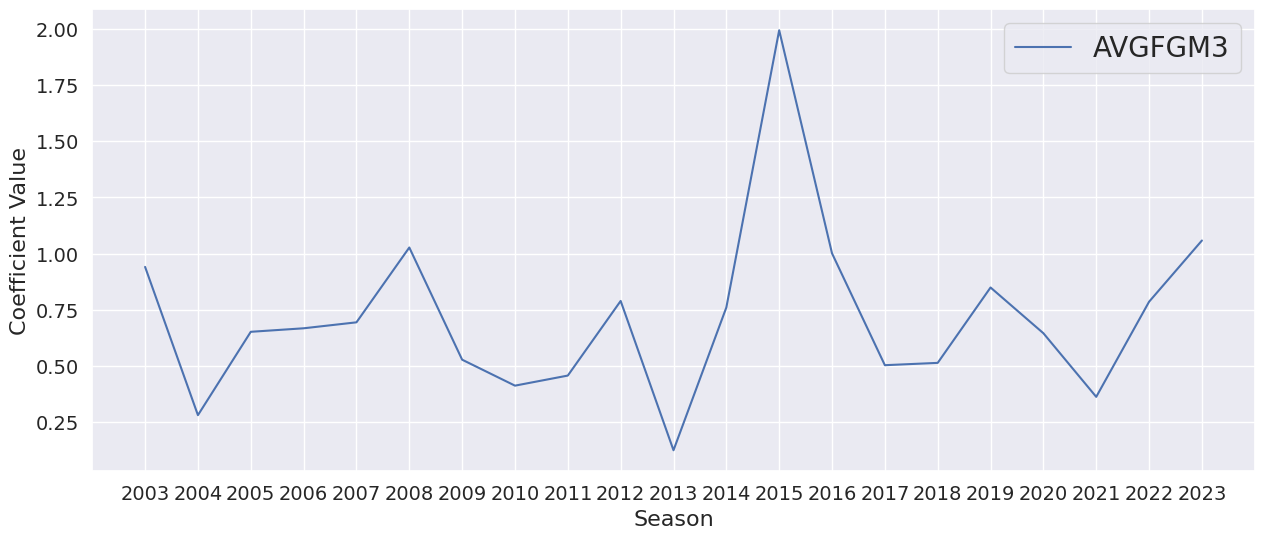

In [20]:
from sklearn import linear_model

statsToMeasure = ["FGM", "FGA", "FGM3", "FGA3", "FTM", "FTA", "OR", "DR", "Ast", "TO", "Stl", "Blk", "PF"]
statsMeasured = ["AVG" + stat for stat in statsToMeasure]
statsMeasured = statsMeasured + ["O" + stat for stat in statsMeasured]
statsMeasured = statsMeasured + ["RAT" + stat for stat in statsToMeasure]

teams = df["TeamID"].unique()
seasons = df["Season"].unique()

seasons = np.arange(2003,2024)

predictedWins = np.zeros(len(seasons))
coeffs = pd.DataFrame(columns = statsMeasured)


for i, season in enumerate(seasons):
    seasonStatsMod = df.loc[df["AVGFGA3"] != 0]
    seasonStatsMod = seasonStatsMod.loc[seasonStatsMod["Season"] == season]
    seasonStatsMod = seasonStatsMod.loc[df["AVGFGA3"] != -1]
    # seasonStatsMod = seasonStatsMod.loc[seasonStatsMod["TeamID"] != 1181]
    X = seasonStatsMod[statsMeasured].to_numpy()
    y = seasonStatsMod["GamesWon"].to_numpy()
   
    
    reg = linear_model.LassoCV(cv=5, random_state=0).fit(X, y)
    
    # Duke = df.loc[df["TeamID"] == 1181]
    # Duke = Duke.loc[Duke["Season"] == season]
    # Duke = Duke[statsMeasured].to_numpy()
    # predictedWins[i] = reg.predict(Duke)
    
    coeffs.loc[len(coeffs)] = reg.coef_


fig, ax = plt.subplots(figsize=(15, 6))



# ax.plot(seasons, predictedWins)
# ax.plot(seasons, actualWins)
# statsToPlot = ["AVGFGM","AVGOR", "AVGFGA3", "RATFTA", "OAVGFGM" ]
statsToPlot = ["AVGFGM3"]
ax.plot(seasons, coeffs[statsToPlot])

ax.set_xticks(seasons)

#ax.set_title("Duke AVGFGA3 importance", size=20)
ax.set_xlabel("Season", size=16)
ax.set_ylabel("Coefficient Value", size=16)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(statsToPlot, fontsize=20)

#plt.savefig("./plots/three.png",dpi=200)
plt.show()

In [21]:
coeffs.mean().sort_values(ascending=False)

AVGFGM      1.403073
AVGFTM      0.721745
AVGFGM3     0.716558
OAVGTO      0.229847
OAVGFGA     0.165716
RATFTM      0.112120
AVGStl      0.099053
AVGFTA      0.091405
AVGDR       0.080134
AVGOR       0.045815
AVGFGA3     0.040576
OAVGPF      0.029328
AVGAst      0.014172
OAVGFGA3    0.011150
AVGBlk      0.011129
RATFTA      0.000000
RATFGA3     0.000000
RATFGA      0.000000
RATStl      0.000000
RATOR       0.000000
RATDR       0.000000
RATAst      0.000000
RATTO       0.000000
RATBlk      0.000000
RATFGM      0.000000
RATPF       0.000000
OAVGFTA    -0.002081
OAVGStl    -0.015148
OAVGOR     -0.022975
AVGPF      -0.043600
AVGFGA     -0.049228
OAVGBlk    -0.082217
OAVGAst    -0.116930
RATFGM3    -0.190342
OAVGDR     -0.204290
AVGTO      -0.254946
OAVGFGM3   -0.803332
OAVGFTM    -0.809441
OAVGFGM    -1.512232
dtype: float64

In [22]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import seaborn as sns
from random import randint
df = pd.read_csv("./seasonStats.csv")

df = df.loc[(df['Season'] >= 2003) & (df['Season'] <= 2023) & (df["HighDay"] >= -1)] 
df = df[df["AVGFGA"] != -1]

selected = ["AVGFGM", "AVGFGM3", "AVGFTM", "OAVGFGM", "OAVGFGM3", "OAVGFTM"]
x = df.loc[:, ["AVGFGM", "AVGFGM3", "AVGFTM", "OAVGFGM", "OAVGFGM3", "OAVGFTM"]].values
y = df.loc[:,['HighDay']].values

x = StandardScaler().fit_transform(x)

pca = PCA(n_components=6)
principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ["pc1", "pc2", "pc3", "pc4", "pc5", "pc6"])


df.reset_index(inplace=True)

principalDf["HighDay"] = df["HighDay"]
principalDf["GamesWon"] = df["GamesWon"]
principalDf["TeamID"] = df["TeamID"]

principalDf.loc[(principalDf["GamesWon"] >= 0) & (principalDf["GamesWon"] <=10), "GamesWon"] = 10
principalDf.loc[(principalDf["GamesWon"] >= 11) & (principalDf["GamesWon"] <=20), "GamesWon"] = 20
principalDf.loc[(principalDf["GamesWon"] >= 21) & (principalDf["GamesWon"] <= 30), "GamesWon"] = 30
principalDf.loc[(principalDf["GamesWon"] >= 31) , "GamesWon"] = 40

print("PCA 1:")
for combo in zip(pca.components_[0], selected):
    print(f"{combo[1]:} {combo[0]}")
 
print()

print("PCA 3:")
for combo in zip(pca.components_[2], selected):
    print(f"{combo[1]:} {combo[0]}")
    

PCA 1:
AVGFGM 0.48890550867091087
AVGFGM3 0.4777565217198707
AVGFTM 0.04974053040977139
OAVGFGM 0.529994750678111
OAVGFGM3 0.4815024749892686
OAVGFTM -0.1323137181579398

PCA 3:
AVGFGM -0.5062595755367485
AVGFGM3 -0.297384457900173
AVGFTM -0.25957240380288726
OAVGFGM 0.404195819628846
OAVGFGM3 0.5043679232437573
OAVGFTM 0.41246167210797574


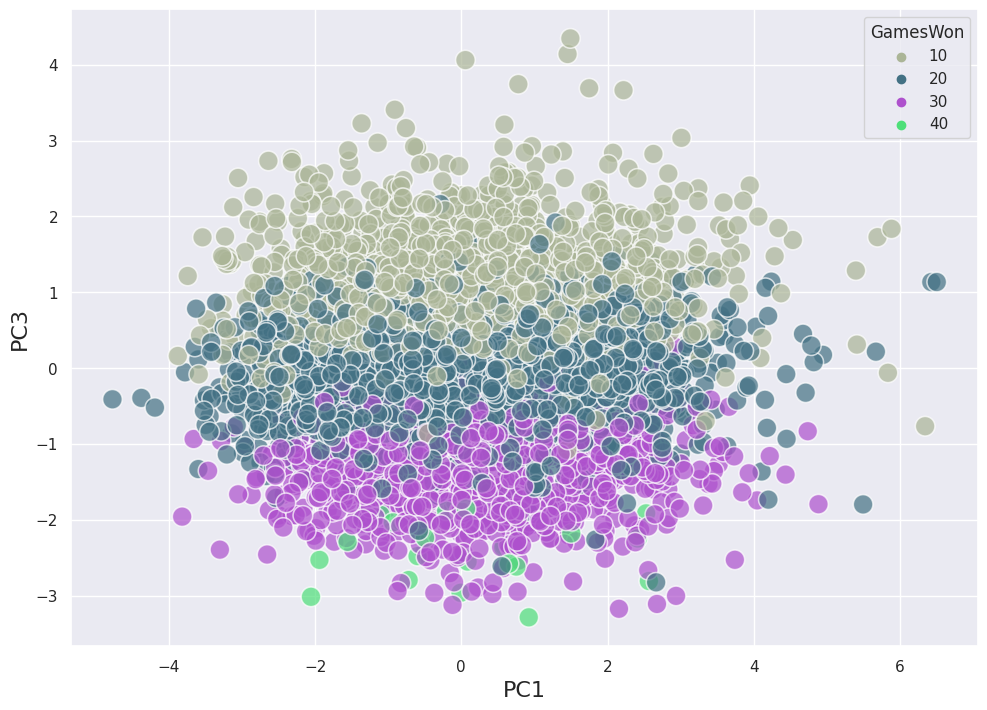

In [24]:
import random
colors = []
n = 4
random.seed(35)
for i in range(n):
    colors.append('#%06X' % randint(0, 0xFFFFFF))

sns.set(rc={'figure.figsize':(11.7,8.27)})

ax = sns.scatterplot(data=principalDf, x="pc1", y = "pc3", hue="GamesWon", palette=colors, s=200, alpha=0.7)

ax.set_xlabel("PC1", size=16)
ax.set_ylabel("PC3", size=16)

#plt.savefig("./plots/pca.png",dpi=200)

plt.show()

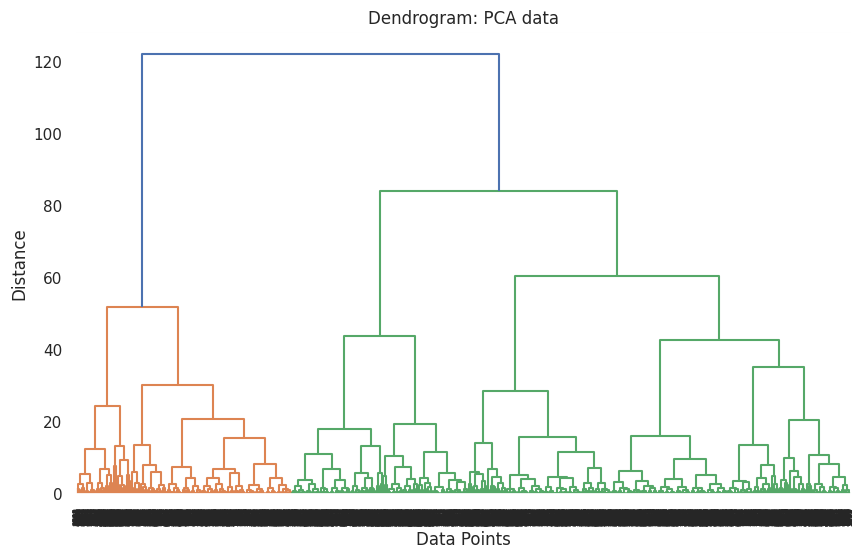

In [25]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram

# Perform hierarchical clustering to obtain the linkage matrix
linkage_matrix = linkage(principalDf.loc[:, ['pc1', 'pc3']], method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('Dendrogram: PCA data')
plt.show()




/tmp/ipykernel_461/571721960.py:6: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  ax = sns.scatterplot(data=principalDf, x="pc1", y="pc3", hue=clusters, palette=colors, s=200, alpha=0.7)


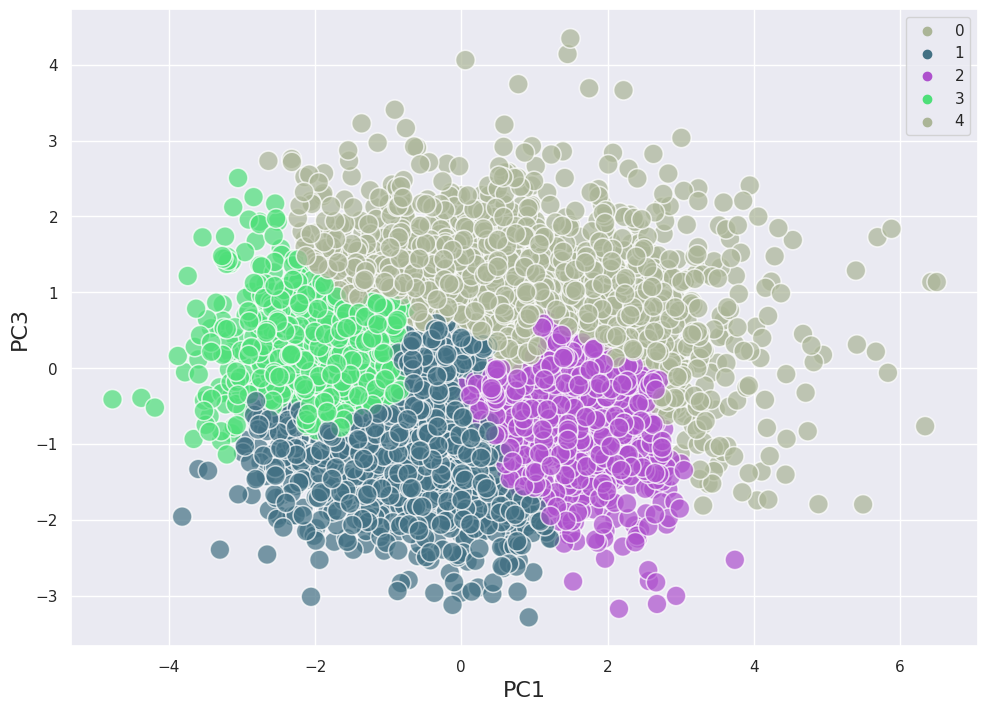

In [28]:
# Perform hierarchical clustering on the data
clustering = AgglomerativeClustering(n_clusters=5)  # Adjust the number of clusters as desired
clusters = clustering.fit_predict(principalDf.loc[:, ['pc1', 'pc3']])

# Visualize the clusters using a scatter plot
ax = sns.scatterplot(data=principalDf, x="pc1", y="pc3", hue=clusters, palette=colors, s=200, alpha=0.7)
ax.set_xlabel("PC1", size=16)
ax.set_ylabel("PC3", size=16)
plt.show()

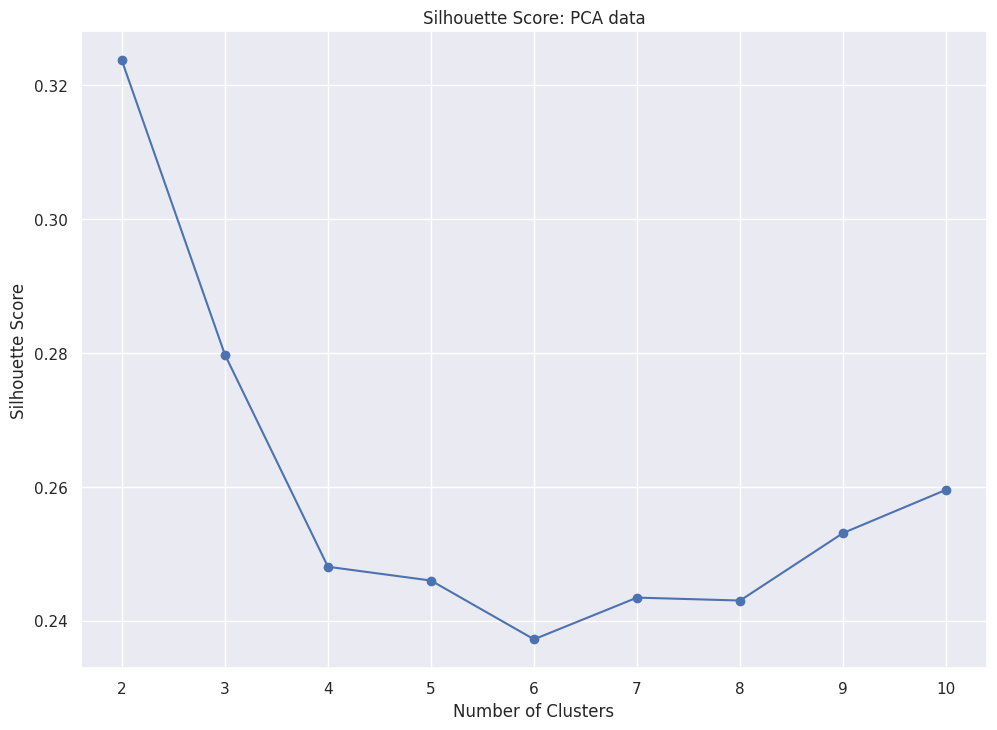

In [33]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for n_clusters in range(2, 11):
    clustering = AgglomerativeClustering(n_clusters=n_clusters)
    clusters = clustering.fit_predict(principalDf.loc[:, ['pc1', 'pc3']])
    silhouette_scores.append(silhouette_score(principalDf.loc[:, ['pc1', 'pc3']], clusters))

# Step 7: Plot the silhouette scores against the number of clusters
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score: PCA data')
plt.show()

In [ ]:
from sklearn.cluster import Birch
pcs = ["pc1", "pc3"]

brc = Birch(n_clusters=4)
brc.fit(principalDf[pcs])
labels = brc.predict(principalDf[pcs])
principalDf["labels"] = labels

fig, ax = plt.subplots()

sns.scatterplot(data=principalDf, x=pcs[0], y=pcs[1], hue="labels", s=200)

plt.show()

In [ ]:
from sklearn.mixture import GaussianMixture
pcs = ["pc1", "pc3"]

gm = GaussianMixture(n_components=3)
gm.fit(principalDf[pcs])
labels = gm.predict(principalDf[pcs])
principalDf["labels"] = labels

fig, ax = plt.subplots()

sns.scatterplot(data=principalDf, x=pcs[0], y=pcs[1], hue="labels", s=200)
ax.set_xlabel("PC1", size=18)
ax.set_ylabel("PC3", size=18)

plt.savefig("./plots/gaussian.png", dpi=200)
plt.show()

In [ ]:
from sklearn.cluster import BisectingKMeans
pcs = ["pc1", "pc3"]

bkm = BisectingKMeans(n_clusters=3)
bkm.fit(principalDf[pcs])
labels = bkm.predict(principalDf[pcs])
principalDf["labels"] = labels

fig, ax = plt.subplots()

sns.scatterplot(data=principalDf, x=pcs[0], y=pcs[1], hue="labels", s=200)

plt.show()

In [ ]:
from sklearn.cluster import DBSCAN
pcs = ["pc1", "pc3"]

db = DBSCAN(eps=0.15)
db.fit(principalDf[pcs])
labels = db.labels_
principalDf["labels"] = labels

fig, ax = plt.subplots()

sns.scatterplot(data=principalDf, x=pcs[0], y=pcs[1], hue="labels", s=200)

plt.show()

In [ ]:
from sklearn.cluster import MeanShift
pcs = ["pc1", "pc3"]

ms = MeanShift(bandwidth=0.5)
ms.fit(principalDf[pcs])
labels = ms.labels_
principalDf["labels"] = labels

fig, ax = plt.subplots()

sns.scatterplot(data=principalDf, x=pcs[0], y=pcs[1], hue="labels", s=200)

plt.show()

In [ ]:
from sklearn.cluster import SpectralClustering
pcs = ["pc1", "pc3"]

sc = SpectralClustering(n_clusters=3)
sc.fit(principalDf[pcs])
labels = sc.labels_
principalDf["labels"] = labels

fig, ax = plt.subplots()

sns.scatterplot(data=principalDf, x=pcs[0], y=pcs[1], hue="labels", s=200)

plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.inspection import DecisionBoundaryDisplay

# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = np.array(principalDf[["pc1", "pc3"]])
y = np.array(principalDf["GamesWon"])

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1 # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.001, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = (
    "SVM with linear kernel",
    "LinearSVM (linear kernel)",
    "SVM with RBF kernel",
    "SVM with polynomial (degree 3) kernel",
)

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel="pc1",
        ylabel="pc3",
    )
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_xlabel("PC1", size = 18)
    ax.set_ylabel("PC3", size = 18)
    ax.set_title(title, size = 20)

plt.savefig("./plots/svm.png")
plt.show()

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import seaborn as sns
from random import randint

df = pd.read_csv("./seasonStats.csv")

df_mod = df.loc[(df['Season'] >= 2003) & (df['Season'] <= 2023) & (df["HighDay"] >= -1)] 

df_mod = df_mod.drop(["Unnamed: 0", "Season", "TeamID", "GamesWon", "HighDay"],axis = 1)
df_mod = df_mod[df_mod["AVGFGA"] != -1]

# selected = ["AVGFGM", "AVGFGM3", "AVGFTM", "OAVGFGM", "OAVGFGM3", "OAVGFTM"]
x = df_mod.values

x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ["pc1", "pc2"])


df.reset_index(inplace=True)

principalDf["GamesWon"] = df["GamesWon"]
principalDf["TeamID"] = df["TeamID"]

principalDf.loc[(principalDf["GamesWon"] >= 0) & (principalDf["GamesWon"] <=10), "GamesWon"] = 10
principalDf.loc[(principalDf["GamesWon"] >= 11) & (principalDf["GamesWon"] <=20), "GamesWon"] = 20
principalDf.loc[(principalDf["GamesWon"] >= 21) & (principalDf["GamesWon"] <= 30), "GamesWon"] = 30
principalDf.loc[(principalDf["GamesWon"] >= 31) , "GamesWon"] = 40

print("PCA 1:")
for combo in zip(pca.components_[0], df_mod.columns):
    print(f"{combo[1]:} {combo[0]}")
 
print()

print("PCA 2:")
for combo in zip(pca.components_[1], df_mod.columns):
    print(f"{combo[1]:} {combo[0]}")


In [ ]:
import random
colors = []
n = 4
random.seed(35)
for i in range(n):
    colors.append('#%06X' % randint(0, 0xFFFFFF))

sns.set(rc={'figure.figsize':(11.7,8.27)})

ax = sns.scatterplot(data=principalDf, x="pc1", y = "pc2", hue="GamesWon", palette=colors, s=200, alpha=0.7)

ax.set_xlabel("PC1", size=16)
ax.set_ylabel("PC2", size=16)

plt.savefig("./plots/pca2.png",dpi=200)

plt.show()